# Using the Iris plants Data Set

In [1]:
# Load the dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
# Display a description of the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# print the target variables 
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
import numpy as np


print('Class labels:', np.unique(iris.target))

Class labels: [0 1 2]


In [5]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(
                              iris.data,               # features
                              iris.target,             # labels
                              test_size = 0.30,          # split ratio
                              random_state = 1,          # set random seed
                              stratify = iris.target)  # randomize based on labels

In [6]:
print('Labels count in y:', np.bincount(iris.target))
print('Labels count in y_train:', np.bincount(train_labels))
print('Labels count in y_test:', np.bincount(test_labels))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


# No normalization (use raw features)

## Logistic Regression

In [7]:
from sklearn import linear_model
x = train_set[:,0:4]      
y = train_labels             

log_regress = linear_model.LogisticRegression(max_iter = 3000)
log_regress.fit(X = x, y = y)

LogisticRegression(max_iter=3000)

In [8]:
print(log_regress.intercept_)    
print(log_regress.coef_)

[  9.77833322   3.11464019 -12.89297341]
[[-0.47927525  0.78036999 -2.29258291 -0.91834137]
 [ 0.15205962 -0.21849006 -0.07826914 -0.69417198]
 [ 0.32721563 -0.56187993  2.37085205  1.61251336]]


In [9]:
import pandas as pd

#---get the predicted probablities and convert into a dataframe---
preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set))

#---assign column names to prediction---
preds_prob.columns = ["Setosa", "Versicolour", "Virginica"]

#---get the predicted class labels---
preds = log_regress.predict(X=test_set)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

#---actual diagnosis---
original_result = pd.DataFrame(test_labels)
original_result.columns = ["Original Result"]

#---merge the three dataframes into one---
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result.head())

     Setosa  Versicolour     Virginica  Prediction  Original Result
0  0.000143     0.080054  9.198030e-01           2                2
1  0.964292     0.035707  4.353088e-07           0                0
2  0.981807     0.018192  8.717110e-08           0                0
3  0.010208     0.736131  2.536601e-01           1                2
4  0.008961     0.859410  1.316287e-01           1                1


In [10]:
#---generate table of predictions vs actual---
print("---Confusion Matrix---")
print(pd.crosstab(preds, test_labels))


---Confusion Matrix---
col_0   0   1   2
row_0            
0      15   0   0
1       0  15   1
2       0   0  14


In [11]:
from sklearn import metrics
#---view the confusion matrix---
print(metrics.confusion_matrix(y_true = test_labels,  # True labels
                               y_pred = preds))       # Predicted labels


[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


### Metrics

In [12]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_logre_nonorm = accuracy_score(test_labels, preds)
print('Accuracy : ' ,acc_logre_nonorm)

Accuracy :  0.9777777777777777


In [13]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_logre_nonorm = f1_score(test_labels, preds, average='weighted')
print('F1-Score : ',f1_logre_nonorm)

F1-Score :  0.9777530589543938


In [14]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_logre_nonorm = mean_squared_error(test_labels, preds)
print('Mean Squared Error : ', mse_logre_nonorm)

Mean Squared Error :  0.022222222222222223


In [15]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
y_true = test_labels
y_pred = preds
hamloss_logre_nonorm = hamming_loss(test_labels, preds)
print('Hamming Loss : ' ,hamloss_logre_nonorm)

Hamming Loss :  0.022222222222222223


## Perceptron

In [16]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(train_set, train_labels)

Perceptron(eta0=0.1, random_state=1)

### Model Evaluation

In [17]:
y_pred = ppn.predict(test_set)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 1


### Metrics

In [18]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_perc_nonorm = accuracy_score(test_labels, y_pred)
print('Accuracy : ' , acc_perc_nonorm)

Accuracy :  0.9777777777777777


In [19]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_perc_nonorm = f1_score(test_labels, y_pred, average='weighted')
print('F1-Score : ', f1_perc_nonorm)

F1-Score :  0.9777530589543938


In [20]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_perc_nonorm = mean_squared_error(test_labels, y_pred)
print('Mean Squared error : ', mse_perc_nonorm)

Mean Squared error :  0.022222222222222223


In [21]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_perc_nonorm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ', hamloss_perc_nonorm)

Hamming Loss :  0.022222222222222223


##  Support Vector Machines

### With Linear Kernel

In [22]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(train_set, train_labels)

SVC(kernel='linear', random_state=1)

### Model Evaluation

In [23]:
y_pred = svm.predict(test_set)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 1


### Metrics

In [24]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_svm_lk_nonorm = accuracy_score(test_labels, y_pred)
print('Accuracy : ' ,acc_svm_lk_nonorm)

Accuracy :  0.9777777777777777


In [25]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_svm_lk_nonorm = f1_score(test_labels, y_pred, average='weighted')
print('F1-Score : ', f1_svm_lk_nonorm)

F1-Score :  0.9777530589543938


In [26]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_svm_lk_nonorm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ', mse_svm_lk_nonorm)

Mean Squared Error :  0.022222222222222223


In [27]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_svm_lk_nonorm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_svm_lk_nonorm)

Hamming Loss :  0.022222222222222223


### With RBF Kernel

In [28]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, random_state=1)
svm.fit(train_set, train_labels)

SVC(random_state=1)

### Model Evaluation

In [29]:
y_pred = svm.predict(test_set)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 1


### Metrics

In [30]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_svm_rbf_nonorm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_svm_rbf_nonorm)

Accuracy :  0.9777777777777777


In [31]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_svm_rbf_nonorm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_svm_rbf_nonorm)

F1-score : 0.9777530589543938


In [32]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_svm_rbf_nonorm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_svm_rbf_nonorm)

Mean Squared Error :  0.022222222222222223


In [33]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_svm_rbf_nonorm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_svm_rbf_nonorm)

Hamming Loss :  0.022222222222222223


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Build a decision tree for classification tasks
# citerion:  The function to measure the quality of a split. 
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or
#            until all leaves contain less than min_samples_split samples.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf:  The minimum number of samples required to to be at a leaf node.
tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)
tree_model.fit(train_set, train_labels)

DecisionTreeClassifier(max_depth=4, random_state=1)

### Model Evaluation

In [35]:
y_pred = tree_model.predict(test_set)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 1


### Metrics

In [36]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_dtree_nonorm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_dtree_nonorm)

Accuracy :  0.9777777777777777


In [37]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_dtree_nonorm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_dtree_nonorm)

F1-score : 0.9777530589543938


In [38]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_dtree_nonorm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_dtree_nonorm)

Mean Squared Error :  0.022222222222222223


In [39]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_dtree_nonorm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_dtree_nonorm)

Hamming Loss :  0.022222222222222223


# Random Forests

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest comprised of 25 decision trees
# citerion:  The function to measure the quality of a split. 
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or
#            until all leaves contain less than min_samples_split samples.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf:  The minimum number of samples required to to be at a leaf node.
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=-1)
forest.fit(train_set, train_labels)

RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=1)

### Model Evaluation

In [41]:
y_pred = forest.predict(test_set)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 1


### Metrics

In [42]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_rforest_nonorm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_rforest_nonorm)

Accuracy :  0.9777777777777777


In [43]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_rforest_nonorm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_rforest_nonorm)

F1-score : 0.9777530589543938


In [44]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_rforest_nonorm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_rforest_nonorm)

Mean Squared Error :  0.022222222222222223


In [45]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_rforest_nonorm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_rforest_nonorm)

Hamming Loss :  0.022222222222222223


# Feed-forward Neural Network with two hidden layers

In [46]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(10,12), alpha = 0.3, max_iter = 1000)

mlp.fit(train_set, train_labels)

MLPClassifier(alpha=0.3, hidden_layer_sizes=(10, 12), max_iter=1000)

### Model Evaluation

In [47]:
y_pred = mlp.predict(test_set)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 1


### Metrics

In [48]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_nnet_nonorm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_nnet_nonorm)

Accuracy :  0.9777777777777777


In [49]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_nnet_nonorm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_nnet_nonorm)

F1-score : 0.9777530589543938


In [50]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_nnet_nonorm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_nnet_nonorm)

Mean Squared Error :  0.022222222222222223


In [51]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_nnet_nonorm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_nnet_nonorm)

Hamming Loss :  0.022222222222222223


# Feature Standardization

In [52]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
stdsc.fit(train_set)
train_set_std = stdsc.fit_transform(train_set)
test_set_std = stdsc.transform(test_set)

## Logistic Regression

In [53]:
from sklearn import linear_model
x = train_set_std[:,0:4]      
y = train_labels              

log_regress = linear_model.LogisticRegression(max_iter = 3000)
log_regress.fit(X = x, y = y)

LogisticRegression(max_iter=3000)

In [54]:
print(log_regress.intercept_)    
print(log_regress.coef_)

[-0.24859523  1.84710937 -1.59851414]
[[-1.05621992  1.01443299 -1.75912759 -1.60015229]
 [ 0.22758382 -0.26580597 -0.13715157 -0.58315373]
 [ 0.8286361  -0.74862702  1.89627916  2.18330602]]


In [55]:
import pandas as pd

#---get the predicted probablities and convert into a dataframe---
preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set_std))

#---assign column names to prediction---
preds_prob.columns = ["Setosa", "Versicolour", "Virginica"]

#---get the predicted class labels---
preds = log_regress.predict(X=test_set_std)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

#---actual diagnosis---
original_result = pd.DataFrame(test_labels)
original_result.columns = ["Original Result"]

#---merge the three dataframes into one---
result = pd.concat([preds_prob, preds_class, original_result], axis=1)
print(result.head())

     Setosa  Versicolour     Virginica  Prediction  Original Result
0  0.000982     0.094605  9.044132e-01           2                2
1  0.982685     0.017314  8.094636e-07           0                0
2  0.985086     0.014914  3.393378e-07           0                0
3  0.018409     0.691541  2.900500e-01           1                2
4  0.011050     0.793586  1.953639e-01           1                1


### Metrics

In [56]:
#---generate table of predictions vs actual---
print("---Confusion Matrix---")
print(pd.crosstab(preds, test_labels))

---Confusion Matrix---
col_0   0   1   2
row_0            
0      15   0   0
1       0  15   1
2       0   0  14


In [57]:
from sklearn import metrics
#---view the confusion matrix---
print(metrics.confusion_matrix(y_true = test_labels,  # True labels
                               y_pred = preds))       # Predicted labels

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [58]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_logre_norm = accuracy_score(test_labels, preds)
print('Accuracy : ', acc_logre_norm)

Accuracy :  0.9777777777777777


In [59]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_logre_norm = f1_score(test_labels, preds, average='weighted')
print('F1-Score : ',f1_logre_norm)

F1-Score :  0.9777530589543938


In [60]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_logre_norm = mean_squared_error(test_labels, preds)
print('Mean Squared Error : ', mse_logre_norm)

Mean Squared Error :  0.022222222222222223


In [61]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_logre_norm = hamming_loss(test_labels, preds)
print("Hamming Loss : ", hamloss_logre_norm)

Hamming Loss :  0.022222222222222223


## Perceptron

In [62]:
import numpy as np


print('Class labels:', np.unique(iris.target))

Class labels: [0 1 2]


In [63]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(train_set_std, train_labels)

Perceptron(eta0=0.1, random_state=1)

### Model Evaluation

In [64]:
y_pred = ppn.predict(test_set_std)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 2


### Metrics

In [65]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_perc_norm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', accuracy_score(test_labels, y_pred))

Accuracy :  0.9555555555555556


In [66]:
##𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_perc_norm = f1_score(test_labels, y_pred, average='weighted')
print('F1-Score : ' , f1_perc_norm)

F1-Score :  0.9555308367321717


In [67]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_perc_norm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_perc_norm)

Mean Squared Error :  0.044444444444444446


In [68]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_perc_norm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ', hamloss_perc_norm)

Hamming Loss :  0.044444444444444446


##  Support Vector Machines

### With Linear Kernel

In [69]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(train_set_std, train_labels)

SVC(kernel='linear', random_state=1)

### Model Evaluation

In [70]:
y_pred = svm.predict(test_set_std)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 1


### Metrics

In [71]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_svm_lk_norm = accuracy_score(test_labels, y_pred)
print('Accuracy : ' ,acc_svm_lk_norm)

Accuracy :  0.9777777777777777


In [72]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_svm_lk_norm = f1_score(test_labels, y_pred, average='weighted')
print('F1-Score : ', f1_svm_lk_norm)

F1-Score :  0.9777530589543938


In [73]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_svm_lk_norm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_svm_lk_norm)

Mean Squared Error :  0.022222222222222223


In [74]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_svm_lk_norm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_svm_lk_norm)

Hamming Loss :  0.022222222222222223


### With RBF Kernel

In [75]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1.0, random_state=1)
svm.fit(train_set_std, train_labels)

SVC(random_state=1)

### Model Evaluation

In [76]:
y_pred = svm.predict(test_set_std)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 1


### Metrics

In [77]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_svm_rbf_norm = accuracy_score(test_labels, y_pred)
print('Accuracy : ' ,acc_svm_rbf_norm)

Accuracy :  0.9777777777777777


In [78]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_svm_rbf_norm = f1_score(test_labels, y_pred, average='weighted')
print('F1-Score : ',f1_svm_rbf_norm)

F1-Score :  0.9777530589543938


In [79]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_svm_rbf_norm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_svm_rbf_norm)

Mean Squared Error :  0.022222222222222223


In [80]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_svm_rbf_norm = hamming_loss(test_labels, y_pred)
print('Hamming loss : ',hamloss_svm_rbf_norm)

Hamming loss :  0.022222222222222223


# Decision Tree

In [81]:
# Decision Treefrom sklearn.tree import DecisionTreeClassifier

# Build a decision tree for classification tasks
# citerion:  The function to measure the quality of a split. 
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or
#            until all leaves contain less than min_samples_split samples.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf:  The minimum number of samples required to to be at a leaf node.
tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)
tree_model.fit(train_set_std, train_labels)

DecisionTreeClassifier(max_depth=4, random_state=1)

### Model Evaluation

In [82]:
y_pred = tree_model.predict(test_set_std)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 1


### Metrics

In [83]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_dtree_norm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_dtree_norm)

Accuracy :  0.9777777777777777


In [84]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_dtree_norm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_dtree_norm)

F1-score : 0.9777530589543938


In [85]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_dtree_norm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_dtree_norm)

Mean Squared Error :  0.022222222222222223


In [86]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_dtree_norm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_dtree_norm)

Hamming Loss :  0.022222222222222223


# Random Forests

In [87]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest comprised of 25 decision trees
# citerion:  The function to measure the quality of a split. 
# max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or
#            until all leaves contain less than min_samples_split samples.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf:  The minimum number of samples required to to be at a leaf node.
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1, n_jobs=-1)
forest.fit(train_set_std, train_labels)

RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=1)

### Model Evaluation

In [88]:
y_pred = y_pred = forest.predict(test_set_std)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 1


### Metrics

In [89]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_rforest_norm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_rforest_norm)

Accuracy :  0.9777777777777777


In [90]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_rforest_norm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_rforest_norm)

F1-score : 0.9777530589543938


In [91]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_rforest_norm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_rforest_norm)

Mean Squared Error :  0.022222222222222223


In [92]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_rforest_norm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_rforest_norm)

Hamming Loss :  0.022222222222222223


# Feed-forward Neural Network with two hidden layers

In [93]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(10,12), alpha = 0.3, max_iter = 1000)

mlp.fit(train_set_std, train_labels)

MLPClassifier(alpha=0.3, hidden_layer_sizes=(10, 12), max_iter=1000)

### Model Evaluation

In [94]:
y_pred = mlp.predict(test_set_std)
print('Misclassified examples (All Features): %d' % (test_labels != y_pred).sum())

Misclassified examples (All Features): 2


### Metrics

In [95]:
#𝑀1 : Classification accuracy
from sklearn.metrics import accuracy_score
acc_nnet_norm = accuracy_score(test_labels, y_pred)
print('Accuracy : ', acc_nnet_norm)

Accuracy :  0.9555555555555556


In [96]:
#𝑀2 : F1-score
from sklearn.metrics import f1_score
f1_nnet_norm = f1_score(test_labels, y_pred, average='weighted')
print('F1-score :',f1_nnet_norm)

F1-score : 0.9555555555555556


In [97]:
#𝑀3 : Mean squared error
from sklearn.metrics import mean_squared_error
mse_nnet_norm = mean_squared_error(test_labels, y_pred)
print('Mean Squared Error : ',mse_nnet_norm)

Mean Squared Error :  0.044444444444444446


In [98]:
#𝑀4 : Hamming loss
from sklearn.metrics import hamming_loss
hamloss_nnet_norm = hamming_loss(test_labels, y_pred)
print('Hamming Loss : ',hamloss_nnet_norm)

Hamming Loss :  0.044444444444444446


# Plots

## No Normalazation

### IRIS Classification Accuracy Metrics

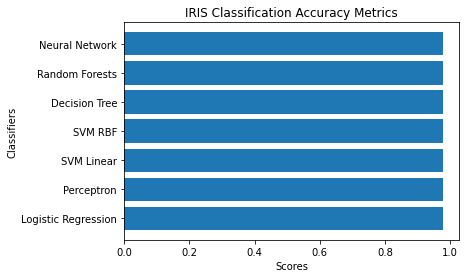

In [99]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [acc_logre_nonorm, acc_perc_nonorm, acc_svm_lk_nonorm, acc_svm_rbf_nonorm, acc_dtree_nonorm, acc_rforest_nonorm, acc_nnet_nonorm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('IRIS Classification Accuracy Metrics')
plt.show()


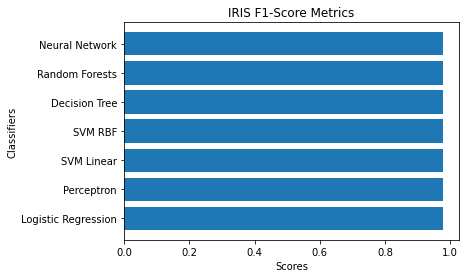

In [100]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [f1_logre_nonorm, f1_perc_nonorm, f1_svm_lk_nonorm, f1_svm_rbf_nonorm, f1_dtree_nonorm, f1_rforest_nonorm, f1_nnet_nonorm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('IRIS F1-Score Metrics')
plt.show()


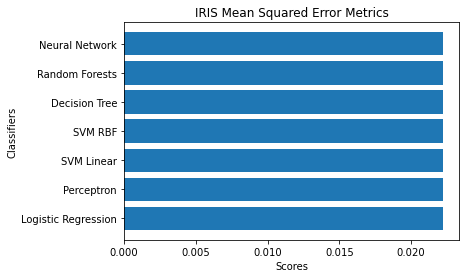

In [101]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [mse_logre_nonorm, mse_perc_nonorm, mse_svm_lk_nonorm, mse_svm_rbf_nonorm, mse_dtree_nonorm, mse_rforest_nonorm, mse_nnet_nonorm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('IRIS Mean Squared Error Metrics')
plt.show()

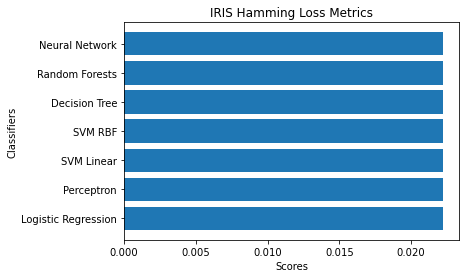

In [102]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [hamloss_logre_nonorm, hamloss_perc_nonorm, hamloss_svm_lk_nonorm, hamloss_svm_rbf_nonorm, hamloss_dtree_nonorm, hamloss_rforest_nonorm, hamloss_nnet_nonorm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('IRIS Hamming Loss Metrics')
plt.show()

## Feature Standardization

### IRIS Classification Accuracy Metrics

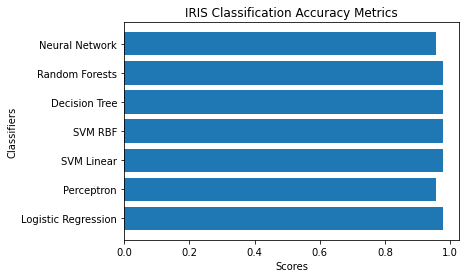

In [103]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [acc_logre_norm, acc_perc_norm, acc_svm_lk_norm, acc_svm_rbf_norm, acc_dtree_norm, acc_rforest_norm, acc_nnet_norm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('IRIS Classification Accuracy Metrics')
plt.show()


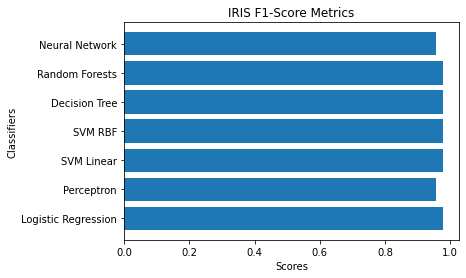

In [104]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [f1_logre_norm, f1_perc_norm, f1_svm_lk_norm, f1_svm_rbf_norm, f1_dtree_norm, f1_rforest_norm, f1_nnet_norm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('IRIS F1-Score Metrics')
plt.show()


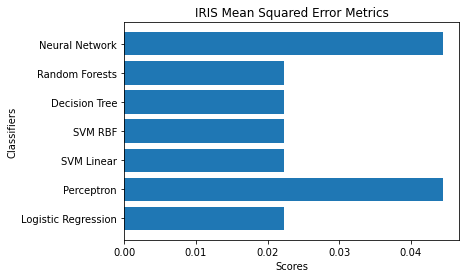

In [105]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [mse_logre_norm, mse_perc_norm, mse_svm_lk_norm, mse_svm_rbf_norm, mse_dtree_norm, mse_rforest_norm, mse_nnet_norm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('IRIS Mean Squared Error Metrics')
plt.show()

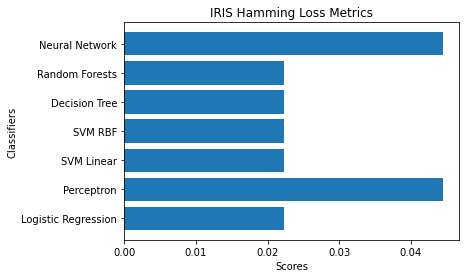

In [106]:
import numpy as np
import matplotlib.pyplot as plt
classifications = [hamloss_logre_norm, hamloss_perc_norm, hamloss_svm_lk_norm, hamloss_svm_rbf_norm, hamloss_dtree_norm, hamloss_rforest_norm, hamloss_nnet_norm]
scores = ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network')
y_pos = np.arange(len(scores))
plt.barh(y_pos, classifications)
plt.yticks(y_pos, scores)
plt.xlabel('Scores')
plt.ylabel('Classifiers')
plt.title('IRIS Hamming Loss Metrics')
plt.show()

# Comparison plots of the classifiers' performance

### (Analysis in Notebook 7)

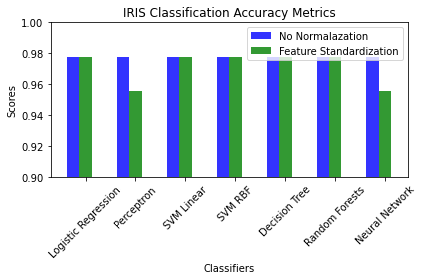

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 7
No_Normalazation = (acc_logre_nonorm, acc_perc_nonorm, acc_svm_lk_nonorm, acc_svm_rbf_nonorm, acc_dtree_nonorm, acc_rforest_nonorm, acc_nnet_nonorm)
Feature_Standardization = (acc_logre_norm, acc_perc_norm, acc_svm_lk_norm, acc_svm_rbf_norm, acc_dtree_norm, acc_rforest_norm, acc_nnet_norm)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
plt.ylim(0.90, 1.0)

rects1 = plt.bar(index, No_Normalazation, bar_width,
alpha=opacity,
color='b',
label='No Normalazation')

rects2 = plt.bar(index + bar_width, Feature_Standardization, bar_width,
alpha=opacity,
color='g',
label='Feature Standardization')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('IRIS Classification Accuracy Metrics')
plt.xticks(index + bar_width, ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network'),rotation = 45)
plt.legend()

plt.tight_layout()
plt.show()

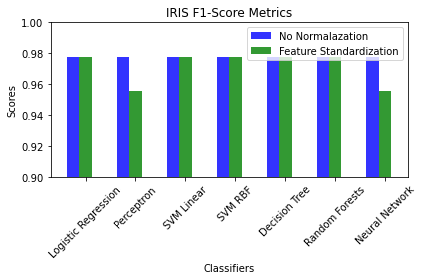

In [108]:
import numpy as np
import matplotlib.pyplot as plt
# data to plot
n_groups = 7
No_Normalazation = (f1_logre_nonorm, f1_perc_nonorm, f1_svm_lk_nonorm, f1_svm_rbf_nonorm, f1_dtree_nonorm, f1_rforest_nonorm, f1_nnet_nonorm)
Feature_Standardization = (f1_logre_norm, f1_perc_norm, f1_svm_lk_norm, f1_svm_rbf_norm, f1_dtree_norm, f1_rforest_norm, f1_nnet_norm)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
plt.ylim(0.90, 1.0)

rects1 = plt.bar(index, No_Normalazation, bar_width,
alpha=opacity,
color='b',
label='No Normalazation')

rects2 = plt.bar(index + bar_width, Feature_Standardization, bar_width,
alpha=opacity,
color='g',
label='Feature Standardization')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('IRIS F1-Score Metrics')
plt.xticks(index + bar_width, ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network'),rotation = 45)
plt.legend()

plt.tight_layout()
plt.show()

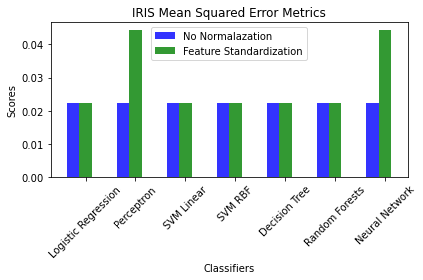

In [109]:
import numpy as np
import matplotlib.pyplot as plt
# data to plot
n_groups = 7
No_Normalazation = (mse_logre_nonorm, mse_perc_nonorm, mse_svm_lk_nonorm, mse_svm_rbf_nonorm, mse_dtree_nonorm, mse_rforest_nonorm, mse_nnet_nonorm)
Feature_Standardization = (mse_logre_norm, mse_perc_norm, mse_svm_lk_norm, mse_svm_rbf_norm, mse_dtree_norm, mse_rforest_norm, mse_nnet_norm)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8


rects1 = plt.bar(index, No_Normalazation, bar_width,
alpha=opacity,
color='b',
label='No Normalazation')

rects2 = plt.bar(index + bar_width, Feature_Standardization, bar_width,
alpha=opacity,
color='g',
label='Feature Standardization')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('IRIS Mean Squared Error Metrics')
plt.xticks(index + bar_width, ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network'),rotation = 45)
plt.legend()

plt.tight_layout()
plt.show()

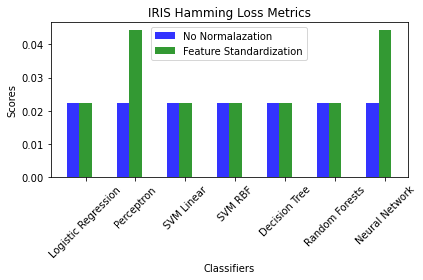

In [110]:
import numpy as np
import matplotlib.pyplot as plt
# data to plot
n_groups = 7
No_Normalazation = (hamloss_logre_nonorm, hamloss_perc_nonorm, hamloss_svm_lk_nonorm, hamloss_svm_rbf_nonorm, hamloss_dtree_nonorm, hamloss_rforest_nonorm, hamloss_nnet_nonorm)
Feature_Standardization = (hamloss_logre_norm, hamloss_perc_norm, hamloss_svm_lk_norm, hamloss_svm_rbf_norm, hamloss_dtree_norm, hamloss_rforest_norm, hamloss_nnet_norm)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8


rects1 = plt.bar(index, No_Normalazation, bar_width,
alpha=opacity,
color='b',
label='No Normalazation')

rects2 = plt.bar(index + bar_width, Feature_Standardization, bar_width,
alpha=opacity,
color='g',
label='Feature Standardization')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('IRIS Hamming Loss Metrics')
plt.xticks(index + bar_width, ('Logistic Regression', 'Perceptron', 'SVM Linear', 'SVM RBF', 'Decision Tree', 'Random Forests', 'Neural Network'),rotation = 45)
plt.legend()

plt.tight_layout()
plt.show()